In [78]:
# import sys, datetime
import serial.tools.list_ports
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
ports = serial.tools.list_ports.comports()
port = None
# print(ports)
for port in ports:
    # print(f"{port}")
    print(f"Порт: {port.device}")
    # print(f"Описание: {port.description}")
    # print(f"VID:PID: {port.vid}:{port.pid}")

if port:
    port = port.device

Порт: COM5


In [89]:
with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=11)) as serialData:
    # Read data from COM port
    command = 'R'

    # Send the command to the DataPort
    serialData.write(command.encode(encoding="utf-8"))
    # serialData.flush()
time.sleep(11)

In [90]:
line = None

with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=47)) as serialData:
    # Read data from COM port
    command = 'S'

    # Send the command to the DataPort
    serialData.write(command.encode())
    
    line = serialData.read(4194305)
    # line = serialData.read(30)
    # line = serialData.readline()
    # line = serialData.read_all()
    # line = serialData.read_until(',')
    # lines = serialData.readlines()

In [141]:
for symbol in line[len(line)-30:len(line)]:
    print(symbol)

65
17
65
17
66
17
66
17
66
17
66
17
66
17
66
17
66
17
66
17
67
17
67
17
67
17
67
17
67
17


In [125]:
intline = []
for num in range(0, 2097152, 2):
    hi_byte = line[num]
    hi_byte = hi_byte if hi_byte < 128 else hi_byte-256
    lo_byte = line[num+1]    
    intline.append(hi_byte*256+lo_byte)
pd.DataFrame(intline)

,0
0,307
1,348
2,342
3,333
4,343
...,...
1048571,-294
1048572,-344
1048573,-276
1048574,-350


1048576

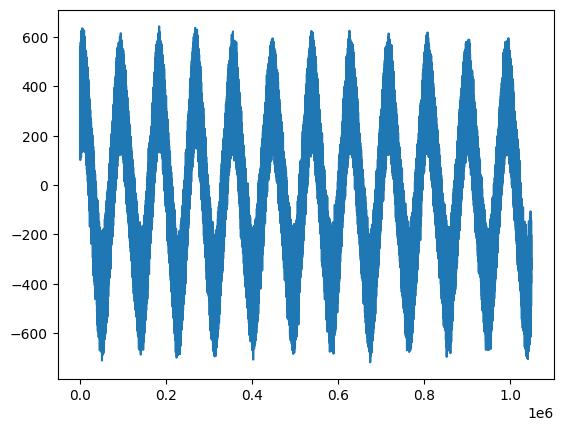

In [103]:
plt.plot(intline)
len(intline)

In [124]:
encoder = []
for num in range(2097152, len(line)-1, 2):
    hi_byte = line[num]
    hi_byte = hi_byte if hi_byte < 128 else hi_byte-256
    lo_byte = line[num+1]    
    encoder.append(hi_byte*256+lo_byte)
pd.DataFrame(encoder)
# pd.DataFrame(encoder).tail(15)


,0
0,7477
1,7477
2,7477
3,7477
4,7477
...,...
1048571,4419
1048572,4419
1048573,4419
1048574,4419


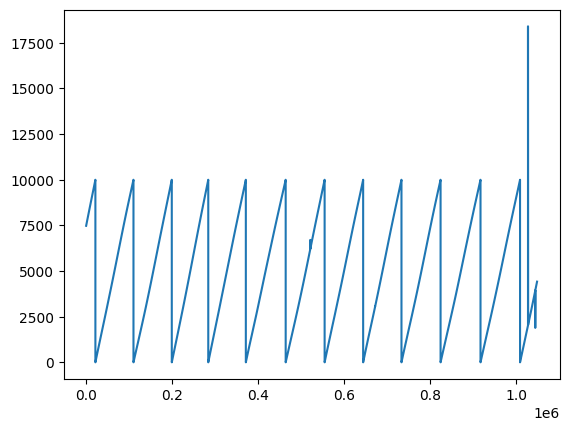

In [121]:
plt.plot(encoder)


In [72]:
# df = pd.DataFrame({'encoder' : encoder, 'data' : intline})
# df.to_csv('data.csv')
df.head(20)

,encoder,data
0,497,-6380
1,497,-2811
2,497,-908
3,496,-132
4,496,-83
5,496,-95
6,496,-136
7,496,-132
8,496,-89
9,496,-105
